# Logistic Regression: Fitting a Sigmoid to Data

This notebook demonstrates the intuition and step-by-step implementation of Logistic Regression using **Gradient Descent** based on **Maximum Likelihood Estimation (MLE)**.
We will use a simple dataset (`Age` vs `Claim`) to fit a sigmoid curve manually and observe the impact of optimization.


This notebook demonstrates how **logistic regression** fits a classification problem  
using **gradient descent** from scratch — without `sklearn` or `statsmodels`.

We will:
- Use one feature: `Age`
- Implement the **sigmoid function**
- Define the **binary cross-entropy loss**
- Derive and apply gradients step-by-step
- Plot results


## 📥 Step 1: Load and Visualize Data

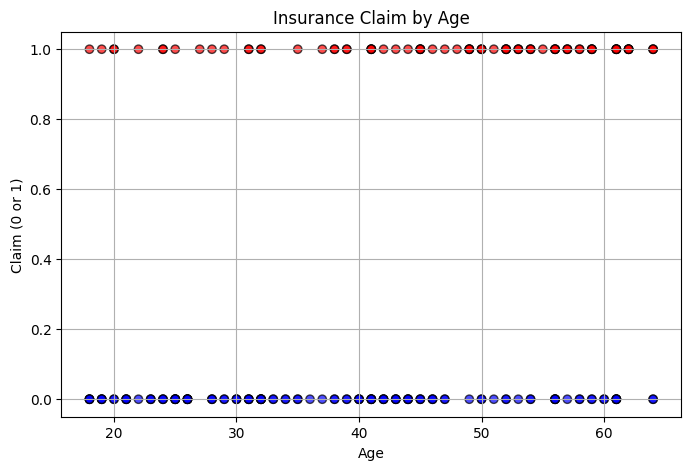

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("data/Insurance_Claim_Dataset.csv")
X = df["Age"].values
y = df["Claim"].values

# Visualize
plt.figure(figsize=(8, 5))
plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Claim (0 or 1)")
plt.title("Insurance Claim by Age")
plt.grid(True)
plt.show()

## Step 2: Define Sigmoid and Cost Function (Log Loss)

We use the **log-likelihood** formulation as our cost function. Maximizing the likelihood is equivalent to minimizing the **log loss**.


The sigmoid function maps any real number to a value between 0 and 1:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

We use this to convert the logit (linear combination of weights) into a probability.

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


The objective is to minimize the **binary cross-entropy** loss:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\right]
$$

Where:
- $\hat{y}^{(i)} = \sigma(\theta_0 + \theta_1 x^{(i)})$


In [3]:
def compute_cost(theta_0, theta_1, X, y):
    m = len(y)
    z = theta_0 + theta_1 * X
    h = sigmoid(z)
    epsilon = 1e-5
    return -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

## Step 3: Gradient Descent (MLE)

We update weights to **maximize likelihood** (or equivalently, minimize negative log-likelihood).


To minimize the cost, we compute the gradient:

1. Gradient with respect to $\theta_0$ (bias):

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum (\hat{y}_i - y_i)
$$

2. Gradient with respect to $\theta_1$ (weight for Age):

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum (\hat{y}_i - y_i) \cdot x_i
$$


In [4]:
theta_0 = 0.0
theta_1 = 0.0
lr = 0.001
epochs = 50000
m = len(y)
cost_history = []

for epoch in range(epochs):
    total_grad_0 = 0.0
    total_grad_1 = 0.0
    cost = 0.0

    for i in range(m):
        x_i = X[i]
        y_i = y[i]
        z = theta_0 + theta_1 * x_i
        h = sigmoid(z)

        error = h - y_i
        cost += -y_i * (np.log(h + 1e-10)) - (1 - y_i) * (np.log(1 - h + 1e-10))
        total_grad_0 += error
        total_grad_1 += error * x_i

    theta_0 -= lr * total_grad_0 / m
    theta_1 -= lr * total_grad_1 / m
    cost_history.append(cost / m)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Cost = {cost / m:.5f}, theta_0 = {theta_0:.5f}, theta_1 = {theta_1:.5f}")

theta_0, theta_1


Epoch 0: Cost = 0.69315, theta_0 = -0.00010, theta_1 = -0.00200
Epoch 1000: Cost = 0.68583, theta_0 = -0.05601, theta_1 = -0.00298
Epoch 2000: Cost = 0.68286, theta_0 = -0.11053, theta_1 = -0.00179
Epoch 3000: Cost = 0.68003, theta_0 = -0.16375, theta_1 = -0.00064
Epoch 4000: Cost = 0.67733, theta_0 = -0.21569, theta_1 = 0.00049
Epoch 5000: Cost = 0.67476, theta_0 = -0.26639, theta_1 = 0.00159
Epoch 6000: Cost = 0.67230, theta_0 = -0.31588, theta_1 = 0.00266
Epoch 7000: Cost = 0.66997, theta_0 = -0.36420, theta_1 = 0.00371
Epoch 8000: Cost = 0.66774, theta_0 = -0.41136, theta_1 = 0.00473
Epoch 9000: Cost = 0.66562, theta_0 = -0.45741, theta_1 = 0.00573
Epoch 10000: Cost = 0.66360, theta_0 = -0.50237, theta_1 = 0.00670
Epoch 11000: Cost = 0.66167, theta_0 = -0.54627, theta_1 = 0.00765
Epoch 12000: Cost = 0.65983, theta_0 = -0.58914, theta_1 = 0.00858
Epoch 13000: Cost = 0.65808, theta_0 = -0.63100, theta_1 = 0.00949
Epoch 14000: Cost = 0.65641, theta_0 = -0.67189, theta_1 = 0.01037
Epoc

(np.float64(-1.6652611639846755), np.float64(0.03173284436376021))

## Step 4: Plot the Sigmoid Line

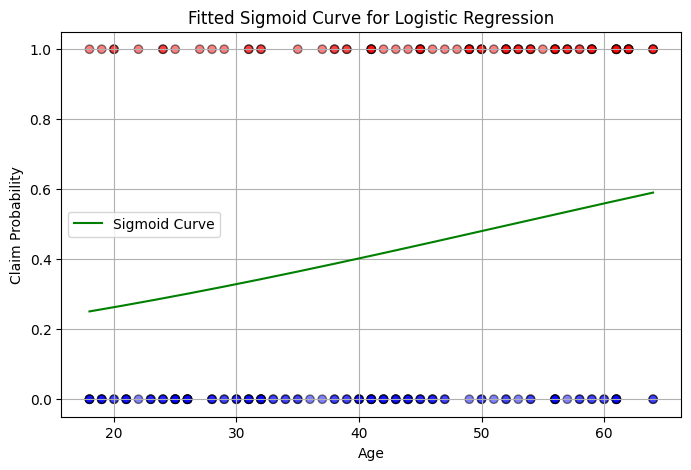

In [5]:
x_range = np.linspace(X.min(), X.max(), 200)
z = theta_0 + theta_1 * x_range
sigmoid_probs = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k', alpha=0.5)
plt.plot(x_range, sigmoid_probs, color='green', label='Sigmoid Curve')
plt.xlabel("Age")
plt.ylabel("Claim Probability")
plt.title("Fitted Sigmoid Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Visualize Log Lost Curve

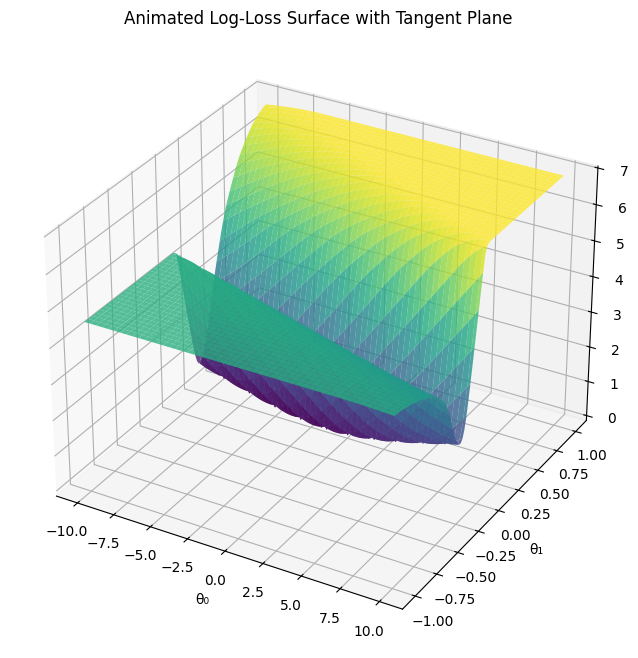

In [6]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D


def log_loss(theta_0, theta_1, X, y):
    z = theta_0 + theta_1 * X
    h = np.clip(sigmoid(z), 1e-5, 1 - 1e-5)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

# Grid for surface
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 1, 100)
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)
Z = np.array([[log_loss(t0, t1, X, y) for t0 in theta0_vals] for t1 in theta1_vals])

# Setup 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("θ₀")
ax.set_ylabel("θ₁")
ax.set_zlabel("Log Loss")
ax.set_title("Animated Log-Loss Surface with Tangent Plane")

surf = ax.plot_surface(Theta0, Theta1, Z, cmap="viridis", alpha=0.8)
tangent = [ax.plot_surface(np.zeros((2,2)), np.zeros((2,2)), np.zeros((2,2)), color='red', alpha=0.5)]

# Animation function
def animate(i):
    for p in tangent: p.remove()
    i0 = i // 10
    i1 = i % 10
    t0 = theta0_vals[i0]
    t1 = theta1_vals[i1]
    z0 = log_loss(t0, t1, X, y)

    # Gradients
    dt0 = (log_loss(t0+1e-4, t1, X, y) - z0) / 1e-4
    dt1 = (log_loss(t0, t1+1e-4, X, y) - z0) / 1e-4

    t0_grid, t1_grid = np.meshgrid(np.linspace(t0-2, t0+2, 10), np.linspace(t1-0.2, t1+0.2, 10))
    z_plane = z0 + dt0 * (t0_grid - t0) + dt1 * (t1_grid - t1)

    tangent[0] = ax.plot_surface(t0_grid, t1_grid, z_plane, color='red', alpha=0.5)
    return tangent[0],

ani = animation.FuncAnimation(fig, animate, frames=100, interval=100)

# Show or save:
# ani.save("Log_Loss_3D_Tangent_Animation.gif", writer="pillow")
plt.show()


##### WHY IT CANNOT BE 2 DIMENSIONAL CURVE?

## 🔍 Understanding the Key Difference: Linear vs Logistic Regression

### 🔹 Linear Regression:
In linear regression, the relationship between the input `x` and output `y` is **direct and linear**:
$ y = mx + c $

- For every **1 unit increase in x**, the output **y increases by m units**, assuming other variables are constant.
- The output `y` can be any real number ($ y \in \mathbb{R} $), making it easy to visualize on a 2D plot.

---

### 🔸 Logistic Regression:
In logistic regression, we are predicting a **probability** using the sigmoid of a linear combination:

$ p = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x)}} $

Or, in terms of **log-odds** (logit function):

$ \log\left(\frac{p}{1 - p}\right) = \theta_0 + \theta_1 x $

- For every **1 unit increase in x**, the **log-odds** of the event occurring increases by $ \theta_1 $.
- This means the **odds** are multiplied by $ e^{\theta_1} $, rather than increasing linearly.
- Because of the non-linear transformation (sigmoid), the impact of `x` on the probability depends on where you are on the sigmoid curve.

---

### 🧠 Key Takeaways:

|                   | Linear Regression                    | Logistic Regression                            |
|-------------------|---------------------------------------|------------------------------------------------|
| Output            | Real number ($y \in \mathbb{R}$)      | Probability ($p(y=1) \in [0,1]$)                |
| Relationship      | Linear ($\Delta x \Rightarrow +m \Delta y$) | Exponential ($\Delta x \Rightarrow \times e^m$ change in odds) |
| Interpretation    | Slope ($m$) is additive               | Slope ($\theta_1$) is multiplicative in odds   |
| Visualization     | Simple 2D plot                        | Needs 3D or sigmoid curve due to non-linearity |

---

Because logistic regression involves **non-linear transformation** and **log-likelihood loss**, analyzing the full cost landscape requires a **3D surface** (typically loss vs $ \theta_0 $ and $ \theta_1 $), especially when visualizing optimization like gradient descent.
